In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from collections import Counter
import warnings
warnings.simplefilter("error", RuntimeWarning)
import pickle

In [24]:
cyto=list(SeqIO.parse('cyto.fasta', 'fasta'))
mito=list(SeqIO.parse('mito.fasta', 'fasta'))
nucl=list(SeqIO.parse('nucleus.fasta', 'fasta'))
secr=list(SeqIO.parse('secreted.fasta', 'fasta'))
blind=list(SeqIO.parse('blind.fasta', 'fasta'))
data={'cyto':cyto, 'mito':mito, 'nucl':nucl, 'secr':secr}
mean_comp = np.load('mean_comp.npy')
with open('alphabet.txt', 'rb') as fp: alphabet=pickle.load(fp)

In [9]:
import PhysioDescriptors
import CarrFeatures

In [10]:
seq=list(str(blind[0].seq))

In [16]:
seqs=[]
for name in blind:
    seqs.append(name.id)

In [11]:
desc=['Hydrophobicity', 'Charge']
desc='all'
phyio_feats = PhysioDescriptors.get_features(seq, desc)
phyio_feats.shape

(1, 336)

In [56]:
carr_feats = CarrFeatures.get_features(seq)
carr_feats.shape

(1, 80)

### Pipeline

In [58]:
cyto=list(SeqIO.parse('cyto.fasta', 'fasta'))
mito=list(SeqIO.parse('mito.fasta', 'fasta'))
nucl=list(SeqIO.parse('nucleus.fasta', 'fasta'))
secr=list(SeqIO.parse('secreted.fasta', 'fasta'))
blind=list(SeqIO.parse('blind.fasta', 'fasta'))
data=[cyto, mito, nucl, secr]
mean_comp = np.load('mean_comp.npy')
with open('alphabet.txt', 'rb') as fp: alphabet=pickle.load(fp)

In [20]:
cyto.append(blind)

In [6]:
def build_vec(data, label):
    vec=np.zeros((len(data),80+48*7+4))
    vec[:,-(5-label)]=1
    for idx, item in enumerate(data):
        seq=list(str(item.seq))
        vec[idx,:80] = CarrFeatures.get_features(seq)
        vec[idx, 80:-4] = PhysioDescriptors.get_features(seq, desc)
    return vec

In [25]:
cyto.extend(blind)

In [26]:
cyto_vec=build_vec(cyto, 1)

In [27]:
np.save('blind_vec.npy', cyto_vec[-20:,:])

In [61]:
mito_vec=build_vec(mito, 2)

In [62]:
nucl_vec=build_vec(nucl, 3)

In [63]:
secr_vec=build_vec(secr, 4)

In [12]:
blind_vec=build_vec(blind, 1)

In [65]:
full_vec=np.concatenate((cyto_vec, mito_vec, nucl_vec, secr_vec, blind_vec), axis=0)
full_vec.shape

(9242, 420)

In [66]:
np.save('full_vec2.npy', full_vec)

In [17]:
secr_vec[0,-4:]

array([ 0.,  0.,  0.,  1.])

In [10]:
blind_vec=blind_vec[:,:-4]
blind_vec.shape

(20, 416)

In [13]:
np.save('blind_vec.npy', blind_vec)

In [12]:
blind_vec[0,-1]

0.11320754716981131

In [67]:
def cmp_mean(comp,alphabet):
    mean = [np.mean(arr[:,:-1], 0) for arr in comp]
    mean = sum(mean)/4
    return np.array(mean)

In [68]:
cmp_mean(blind[0].seq, alphabet)

TypeError: string indices must be integers

In [69]:
blind[0].seq

Seq('MESKGASSCRLLFCLLISATVFRPGLGWYTVNSAYGDTIIIPCRLDVPQNLMFG...TEA', SingleLetterAlphabet())

In [71]:
AA_compositional=np.zeros((20,20))
for idx,seq in enumerate(blind):
    seq_count=Counter(list(str(seq.seq)))
    seq_len=len(list(str(seq.seq)))
    for pos, letter in enumerate(alphabet):
        AA_compositional[idx,pos] = seq_count[letter]/seq_len

In [88]:
np.save('mean_comp_blind.npy', np.mean(AA_compositional, axis=0))

NameError: name 'full_vec' is not defined

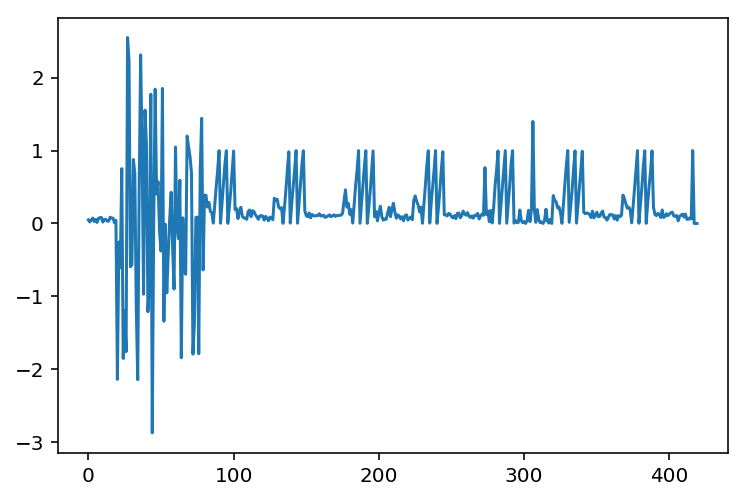